In [5]:
import piplite
await piplite.install('seaborn')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif




## reading the data and view sample of 15 of dataSet
df = pd.read_csv("Predict Hair Fall.csv")
sample=df.sample(n=15);
print(sample);

         Id Genetics Hormonal Changes     Medical Conditions  \
56   138992       No               No               Ringworm   
813  170824      Yes              Yes       Alopecia Areata    
510  142702       No               No              Psoriasis   
486  151390      Yes              Yes                No Data   
712  132799       No              Yes       Thyroid Problems   
588  197303      Yes               No              Psoriasis   
825  156371       No              Yes              Psoriasis   
330  180433       No              Yes       Thyroid Problems   
474  151826      Yes               No                No Data   
304  167494       No               No        Scalp Infection   
331  175900       No              Yes        Scalp Infection   
277  194928       No              Yes             Dermatosis   
61   113790       No               No             Dermatitis   
159  139985      Yes               No                 Eczema   
782  179525      Yes              Yes  S

In [7]:
## number of row
NR=df.shape[0]
print (NR)

999


In [5]:
## number of columns
NC=df.shape[1]
print (NC)

13


In [5]:
## number of row
NR=df.shape[0]
print (NR)


13


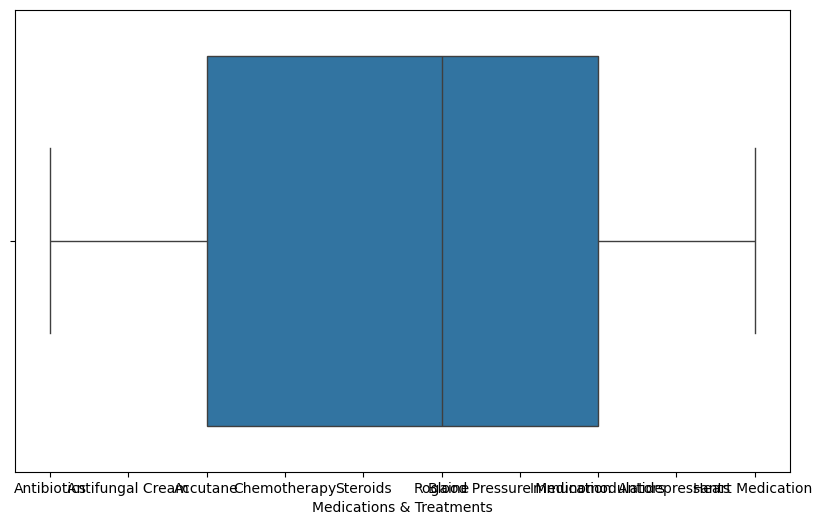

In [92]:
##grpahs

%matplotlib inline
import matplotlib.pyplot as plt
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medications & Treatments', data=df)
plt.show()

 Box_Plots  provide a concise summary of the distribution, central tendency and  checking data outliers 

<AxesSubplot:xlabel='Medical Conditions'>

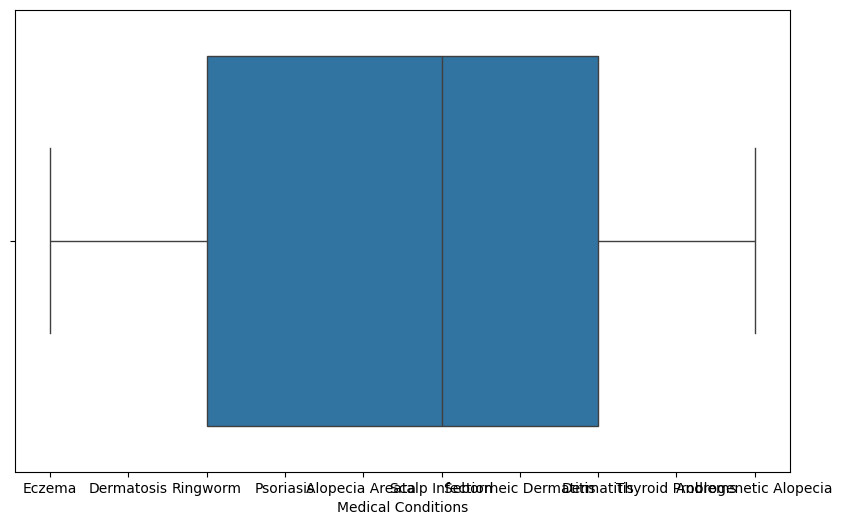

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Conditions', data=df)


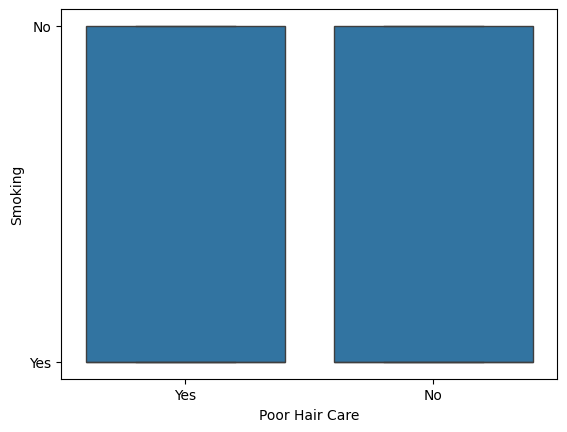

In [95]:
sns.boxplot(x= 'Poor Hair Care',y='Smoking',data=df)
plt.show()

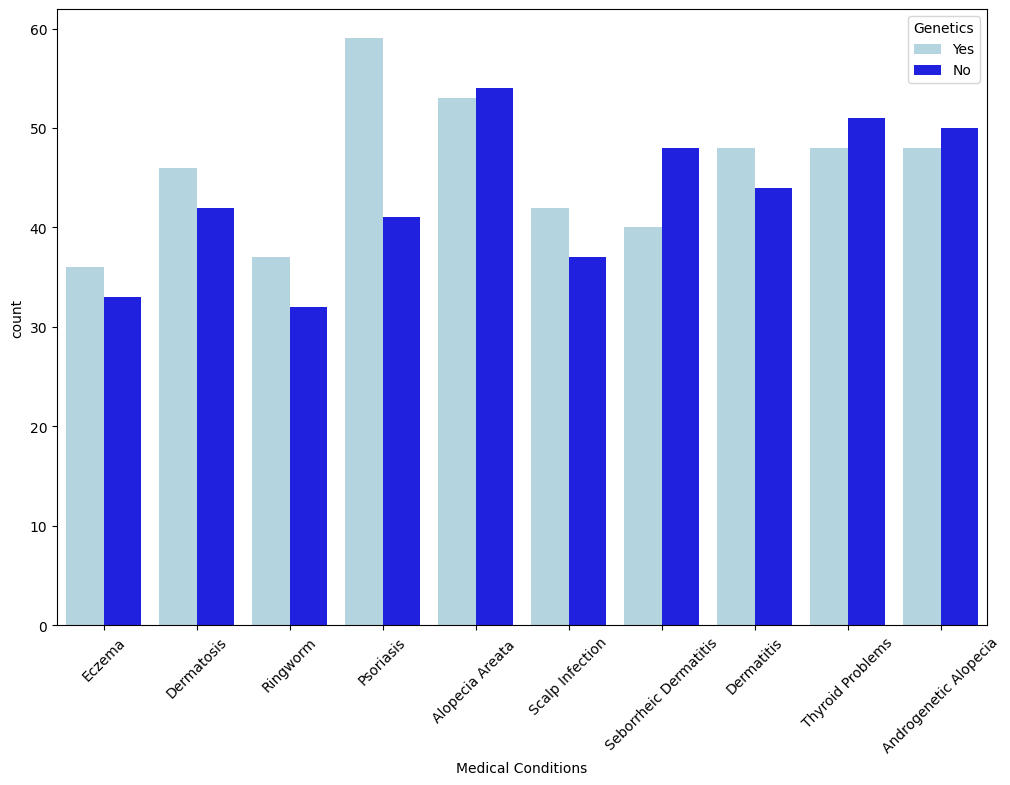

In [33]:
# bar chart
plt.figure(figsize=(12,8))
sns.countplot(x='Medical Conditions', data=df, hue='Genetics',palette= ['lightblue','blue'])
plt.xlabel('Medical Conditions')
plt.xticks(rotation=45)
plt.show()




The bar chart shows the distribution of genes across different medical conditions in the dataset and allows for a quick comparison of the spread of baldness genes among individuals with various medical conditions.

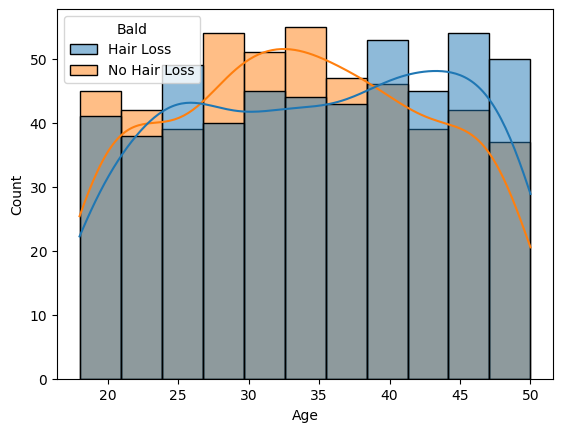

In [17]:

df["Bald"] = df["Hair Loss"].apply(lambda x: "Hair Loss" if x == 0 else "No Hair Loss")
sns.histplot(df, x="Age", hue="Bald", kde=True)
plt.show()


 from the histogrem Age influence on hair loss

In [11]:
##show & check missing values

df.replace("No Data", np.nan, inplace=True)

missing_values=df.isna().sum()

print("Missing Values in each column:")
print(missing_values)


Missing Values in each column:
Id                            0
Genetics                      0
Hormonal Changes              0
Medical Conditions          110
Medications & Treatments      2
NutritionalDeficien          80
Stress                        0
Age                           0
Poor Hair Care                0
Environmental Factors         0
Smoking                       0
WeightLoss                    0
Hair Loss                     0
dtype: int64


The missing data in our dataset labeld with "No Data" , we replace it with nan to detecate the missing value. 

We figured out that we have 192 missing value. 110 in "Medical Conditions" ,  2  "Medications & Treatments" , 80 in "NutritionalDeficien"

In [9]:
#the missing vaule in our dataset labeld with "No Data" , we replace it with nan then we delete it.

df.replace("No Data", np.nan, inplace=True)

missing = df.isna().sum()
print(missing.sum())

#deleting NaN value.
Data_cleand = df.dropna()

print(Data_cleand)

Data_cleand.to_csv('Data_cleand.csv', index=False) #to save file after removing missing value .

192
         Id Genetics Hormonal Changes     Medical Conditions  \
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
5    139661      Yes               No              Psoriasis   
..      ...      ...              ...                    ...   
992  181854      Yes              Yes             Dermatosis   
994  184367      Yes               No  Seborrheic Dermatitis   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments   NutritionalDeficien    Stress  Age  \
1                  Antibiotics  Magnesium deficiency      High   43   
2             Antifungal Cream    Protein deficiency  Moderate   26   
3             

Here our dataset after removing the missing vaule.

In [17]:
#Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:
df.describe()


,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


1- Age : The ages ranging from 18 to 50 years old, with an average age of approximately 34 years. This indicates the possibility that hair loss in individuals begins at the age of 18 years old and above. 

2- Hair loss: This binary variable indicates whether an individual is experiencing hair loss or not. The majority of individuals (approximately 50.75%) do experience hair loss, as indicated by a mean of approximately 0.50. The distribution of this variable shows that about 50% of individuals do not experience hair loss (as indicated by the median and 1st Quarter being 0), while the remaining 50% do experience hair loss.

In [23]:
var_data= ['Id', 'Age', 'Hair Loss']
var_dat = df[var_data]
variance = var_dat.var()
print(variance)

Id           6.510684e+08
Age          8.794651e+01
Hair Loss    2.502442e-01
dtype: float64



the variance for [ Id, Age, Hair Loss ] coulmns.

In [10]:
## Encoding catogrical data
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy import stats

data1 = pd.read_csv("Data_cleand.csv")

le = LabelEncoder()
data1['Genetics'] = le.fit_transform(data1['Genetics'])

data1['Hormonal Changes'] = le.fit_transform(data1['Hormonal Changes'])

data1['Poor Hair Care'] = le.fit_transform(data1['Poor Hair Care'])
data1['WeightLoss'] = le.fit_transform(data1['WeightLoss'])

data1['Environmental Factors'] = le.fit_transform(data1['Environmental Factors'])

data1['Smoking'] = le.fit_transform(data1['Smoking'])

data1['Medical Conditions'] = le.fit_transform(data1['Medical Conditions'])

data1['Medications & Treatments'] = le.fit_transform(data1['Medications & Treatments'])

data1['NutritionalDeficien'] = le.fit_transform(data1['NutritionalDeficien'])

data1['Stress'] = le.fit_transform(data1['Stress'])

print(data1)


data1.to_csv('Data_cleand.csv', index=False) #to save file after encoding .


         Id  Genetics  Hormonal Changes  Medical Conditions  \
0    148393         0                 0                   4   
1    155074         0                 0                   3   
2    118261         1                 1                   6   
3    111915         0                 0                   5   
4    139661         1                 0                   5   
..      ...       ...               ...                 ...   
804  181854         1                 1                   3   
805  184367         1                 0                   8   
806  143273         0                 1                   1   
807  169123         0                 1                   2   
808  127183         1                 1                   5   

     Medications & Treatments  NutritionalDeficien  Stress  Age  \
0                           1                    2       0   43   
1                           3                    4       2   26   
2                           1             


Here we use encoder method to transform the String value to 0 and 1 value. 

In [23]:
# Detect and Remove outlier
from scipy.stats import zscore
Genetics = data1['Genetics']

z_scores_Gen = zscore(Genetics)

threshold = 2

outliers = data1[abs(z_scores_Gen) > threshold]

# Remove the row  
df_no_outlier = data1.drop(outliers.index) 
print("after remove Outliers from'Genetics' column:")
display(data1)

data1.to_csv('Data_cleand.csv', index=False) #to save file after removing outliers .

after remove Outliers from'Genetics' column:


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,NutritionalDeficien,Stress,Age,Poor Hair Care,Environmental Factors,Smoking,WeightLoss,Hair Loss,discretized_Age
0,148393,0,0,4,1,2,0,0.78125,1,1,0,0,0,2
1,155074,0,0,3,3,4,2,0.25000,1,1,0,1,0,0
2,118261,1,1,6,1,0,2,0.87500,1,1,0,0,0,2
3,111915,0,0,5,0,1,2,0.37500,0,1,1,0,1,1
4,139661,1,0,5,1,2,1,0.59375,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,181854,1,1,3,8,2,1,0.37500,0,0,0,0,1,1
805,184367,1,0,8,8,6,1,0.46875,1,1,1,1,1,1
806,143273,0,1,1,2,4,2,0.06250,1,0,1,1,1,0
807,169123,0,1,2,7,0,2,0.43750,1,1,1,1,1,1


In [11]:
# Discretization
column_to_discretize= 'Age'
num_bins=3
data1['discretized_' + column_to_discretize] = pd.cut(data1[column_to_discretize], bins=num_bins, labels=False)
print("Orignial DataFrame:")
print(data1[['Age', 'discretized_Age']])

data1.to_csv('data_discretize.csv', index=False) #to save file after discretize .

Orignial DataFrame:
     Age  discretized_Age
0     43                2
1     26                0
2     46                2
3     30                1
4     37                1
..   ...              ...
804   30                1
805   33                1
806   20                0
807   32                1
808   34                1

[809 rows x 2 columns]


In [12]:
#Normalization
columns_to_normalize = ['Age']
data_to_normalize = data1[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
data1[columns_to_normalize] = normalized_data_minmax
print("Min-Max scaled data (only age column):")
print(data1)

data1.to_csv('data_normalize.csv', index=False) #to save file after normalize .

Min-Max scaled data (only age column):
         Id  Genetics  Hormonal Changes  Medical Conditions  \
0    148393         0                 0                   4   
1    155074         0                 0                   3   
2    118261         1                 1                   6   
3    111915         0                 0                   5   
4    139661         1                 0                   5   
..      ...       ...               ...                 ...   
804  181854         1                 1                   3   
805  184367         1                 0                   8   
806  143273         0                 1                   1   
807  169123         0                 1                   2   
808  127183         1                 1                   5   

     Medications & Treatments  NutritionalDeficien  Stress      Age  \
0                           1                    2       0  0.78125   
1                           3                    4       2  0.

In [70]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.select_dtypes(include=['number']).drop(columns=['Poor Hair Care'])  # Select numerical features
y = df['Poor Hair Care']  # Target variable

# Assuming df is your DataFrame and 'target_column' is the target variable
X = df.drop(columns=['Genetics'])  # Features
y = df['Genetics']  # Target variable

# SelectKBest with chi-squared test
best_features = SelectKBest(score_func=chi2, k=2)  # Select top 2 features
fit = best_features.fit(X, y)

# Get scores and corresponding feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print top 2 features
print("Top 2 features:")
print(feature_scores.head(2))

Top 2 features:
            Feature        Score
0                Id  4855.699828
12  discretized_Age     1.269351


In [13]:
Fdata= pd.read_csv('data_normalize.csv')

Fdata.to_csv('FinalDataset_phase2.csv', index=False) #final Dataset for phase2 .